In [1]:
from pymongo import MongoClient
from gridfs import GridFS

In [2]:
from PIL import Image
from io import BytesIO

In [3]:
db = MongoClient().python_test

In [4]:
fs = GridFS(db)

In [5]:
image_list = list(db.fs.files.find())
image_list

[{'_id': ObjectId('5de740bac9c892a75cb41dc7'),
  'filename': '890230_0.gif?type=m4500_4500_fst',
  'metadata': {'contentType': 'image/gif?type=m4500_4500_fst', 'type': 'cat'},
  'chunkSize': 261120,
  'md5': '2a9bd936adfc0ddc650084dd5c278eb9',
  'length': 15491,
  'uploadDate': datetime.datetime(2019, 12, 4, 5, 14, 34, 580000)},
 {'_id': ObjectId('5de740bac9c892a75cb41dc9'),
  'filename': '20150203001206_0_99_20150204074103.jpg',
  'metadata': {'contentType': 'image/jpg', 'type': 'cat'},
  'chunkSize': 261120,
  'md5': '4b784cbf72b85e54976c92f18dcf26b9',
  'length': 34465,
  'uploadDate': datetime.datetime(2019, 12, 4, 5, 14, 34, 664000)},
 {'_id': ObjectId('5de740bac9c892a75cb41dcb'),
  'filename': 'Ix-Q2Hr7WP-HyMNdYFg8at7R6MKg.jpg',
  'metadata': {'contentType': 'image/jpg', 'type': 'cat'},
  'chunkSize': 261120,
  'md5': '996402d44bafa6e02ad469694e99fd22',
  'length': 57746,
  'uploadDate': datetime.datetime(2019, 12, 4, 5, 14, 34, 743000)},
 {'_id': ObjectId('5de740bac9c892a75cb41d

In [6]:
IM_WIDTH = 200
IM_HEIGHT = 200

In [7]:
images = []
labels = []

In [8]:
import numpy as np

In [9]:
for file_detail in image_list:
    filename = file_detail['filename']
    f = fs.get_last_version(filename=filename)
    data = f.read()
    im = Image.open(BytesIO(data))
    im = im.convert('L')
    im = im.resize((IM_WIDTH,IM_HEIGHT))
    im = np.array(im)
    im = im.flatten()
    im = im/255.0
    im = im.astype('float32')
    images.append(im)
    label = 1 if 'cat' in file_detail['metadata']['type'] else 0
    labels.append(label)

In [10]:
images_arr = np.array(images)
lables_arr = np.array(labels)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_arr, lables_arr)

In [12]:
from sklearn import svm

In [13]:
SVM = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)

C:\Users\JMLAP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
SVM.score(X_test,y_test)

0.5289256198347108

In [24]:
new_image = []
new_images_arr = []
image = Image.open('c:/ai/workspace/mongodb/siba.jpg')
im = Image.open(BytesIO(data))
im = im.convert('L')
im = im.resize((IM_WIDTH,IM_HEIGHT))
im = np.array(im)
im = im.flatten()
im = im/255.0
im = im.astype('float32')
new_image.append(im)
new_images_arr = np.array(new_image)
predict = SVM.predict(new_images_arr)
if predict[0] == 1:
    print('고양이')
else:
    print('강아지')

강아지


In [25]:
predict

array([0])

In [26]:
import matplotlib.pyplot as plt

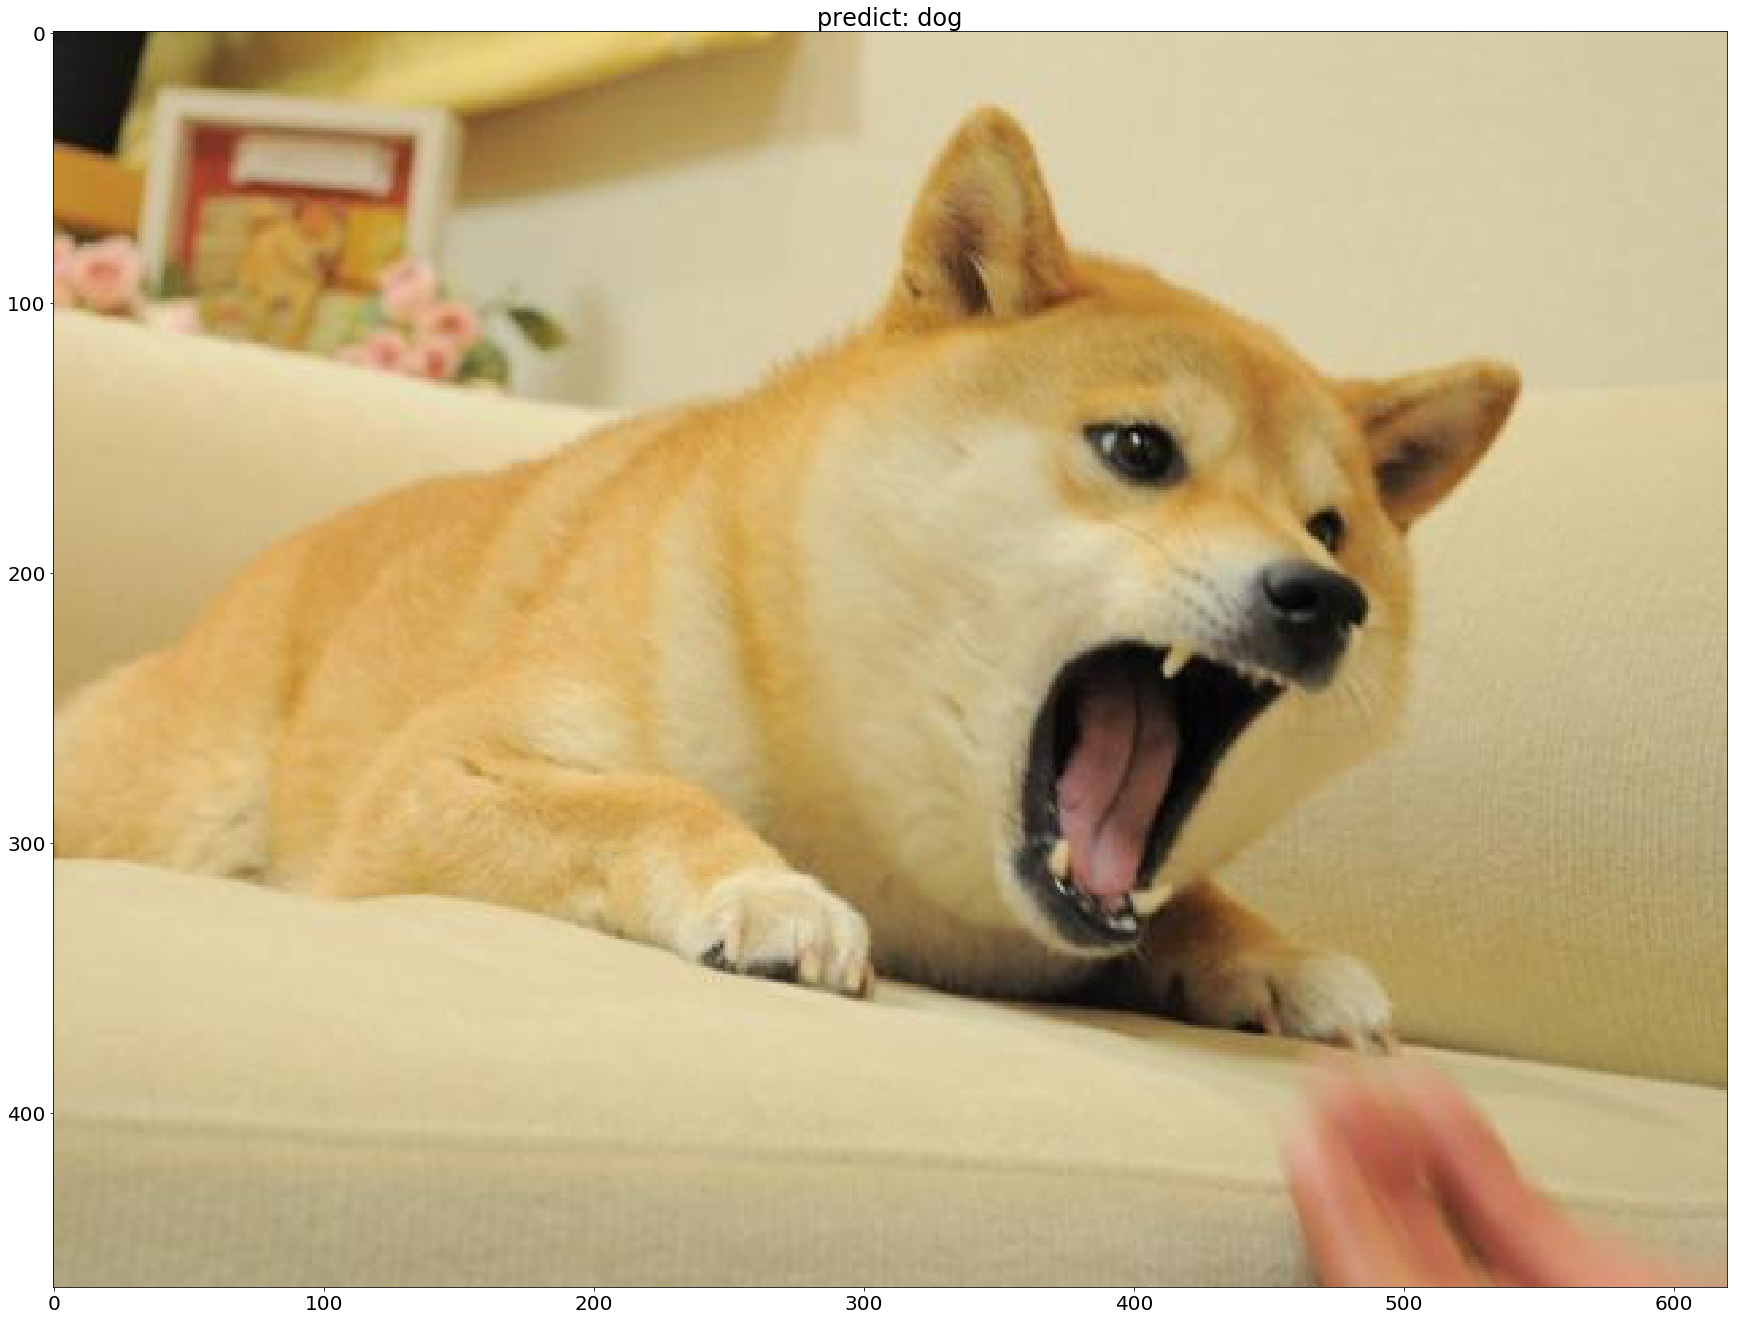

In [28]:
plt.rc('font', size=20)
fig = plt.figure(figsize=(30,30))
model_out = predict[0]
if model_out ==1:
    str_label = 'cat'
else:
    str_label = 'dog'
plt.title('predict: %s' % str_label)
plt.imshow(image)
plt.show()